<a href="https://colab.research.google.com/github/priyacoding/Retail-sales-forecasting/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

Importing datasets and joining them together


In [ ]:
# Load sales dataset
df = pd.read_csv(r'/content/sales_data_set.csv')
# Load features dataset and join it with sales data
features_df = pd.read_csv(r'/content/Features_data_set.csv')
df = pd.merge(df, features_df.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date'])
# Load store dataset and join with above data
stores_df = pd.read_csv(r'/content/stores_data_set.csv')
df = pd.merge(df, stores_df, how = 'left', on = ['Store'])
df.shape

(421570, 16)

In [ ]:
df.head() #first 5 rows

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Exploring data


In [ ]:
# Let's explore variables, their data types, and total non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Statistics

In [ ]:
# summary statistics of the dataset
df[['Weekly_Sales', 'Temperature', 'CPI', 'Size']].describe()

,Weekly_Sales,Temperature,CPI,Size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,171.201947,136727.915739
std,22711.183519,18.447931,39.159276,60980.583328
min,-4988.940000,-2.060000,126.064000,34875.000000
25%,2079.650000,46.680000,132.022667,93638.000000
50%,7612.030000,62.090000,182.318780,140167.000000
75%,20205.852500,74.280000,212.416993,202505.000000
max,693099.360000,100.140000,227.232807,219622.000000


Viewing date range

In [ ]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))

Min Date in Data is - 01/04/2011
Max Date in Data is - 31/12/2010


Viewing store types

  Type  Store
0    A     22
1    B     17
2    C      6


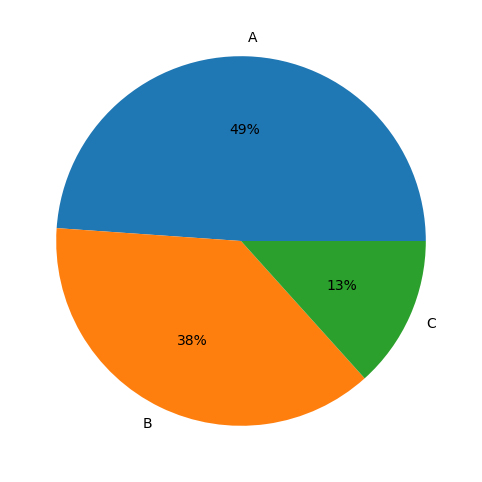

In [ ]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()

Plotting size of stores

<Axes: xlabel='Type', ylabel='Size'>

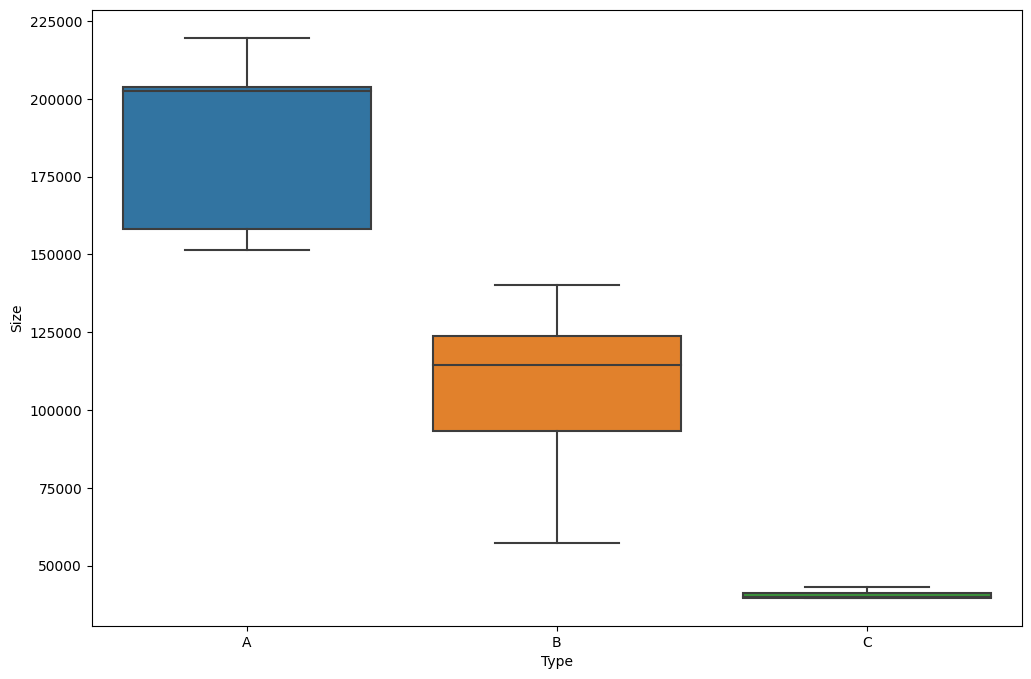

In [ ]:
# size distribution of stores for each store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = df, showfliers = False)

Plotting weekly sales based on store type

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

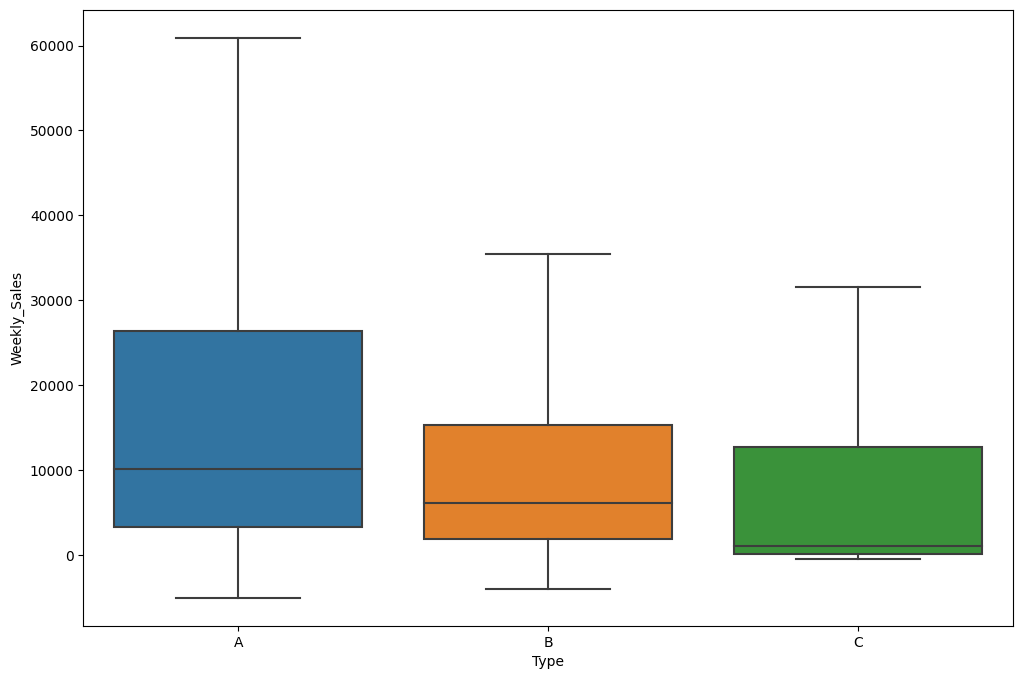

In [ ]:
# Distribution of weekly sales based on store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = df, showfliers = False)


Holiday and non-holiday Vs. Weekly sales

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

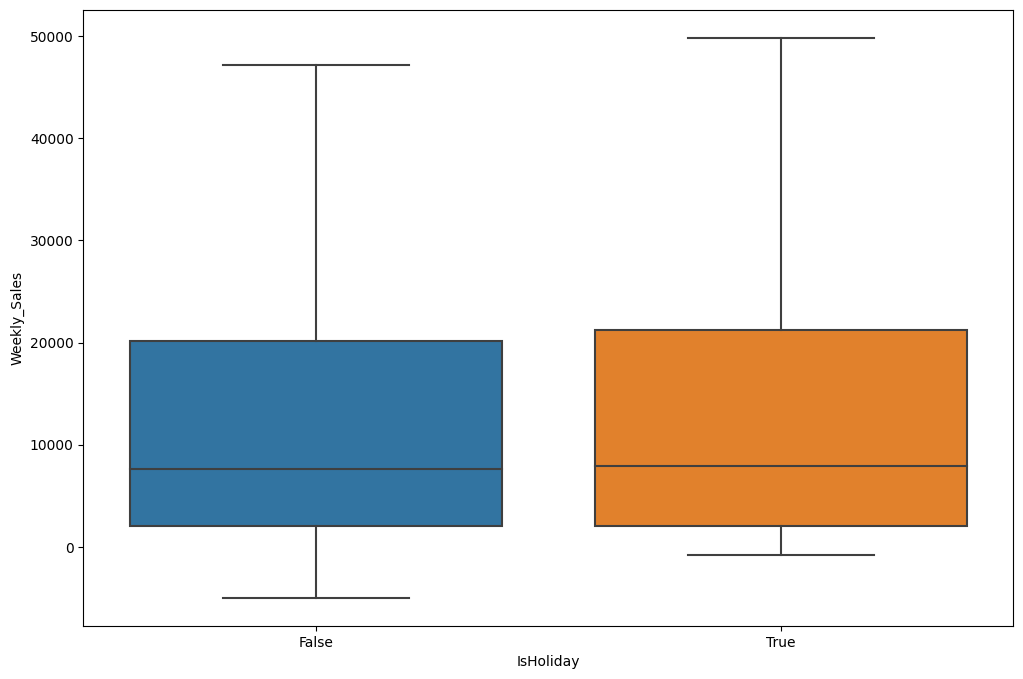

In [ ]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = df, showfliers = False)

Correlation between variables

<Axes: >

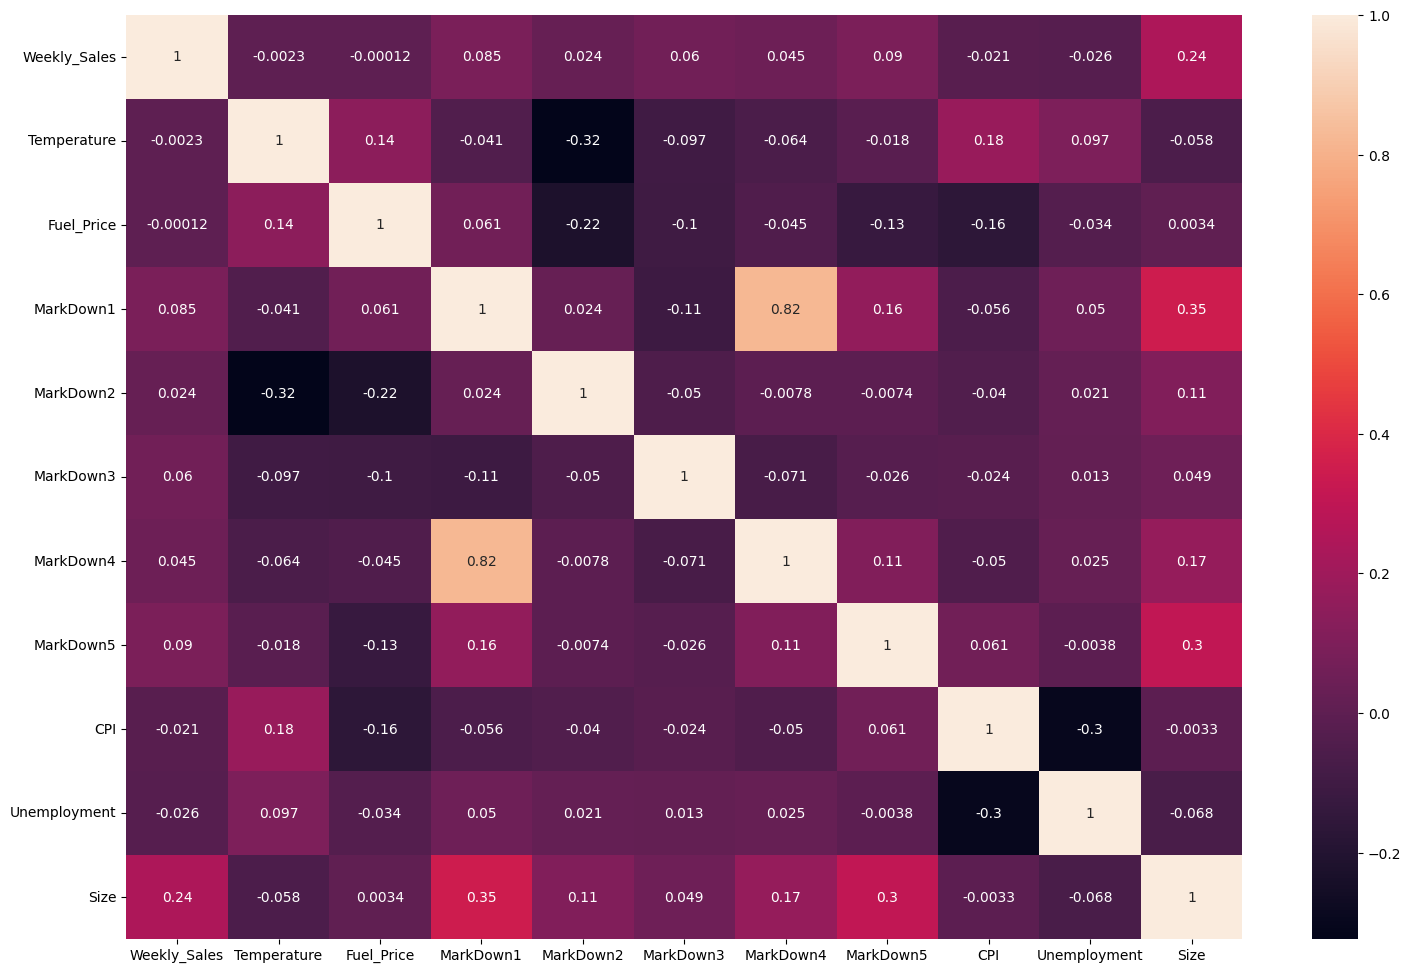

In [ ]:
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

Filling NULL values

In [ ]:
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)


In [ ]:
# df.to_csv('cleanedsSales.csv', index=False) # Save clean data for future use

Data preprocessing and feature engineering

In [ ]:

# Impute NULL values
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

# create year, month, and date
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)

# one hot encoding
cols_to_encode = ['Type', 'IsHoliday']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Weekly_Sales'], test_size = 0.2, random_state = 1234)

<ipython-input-13-639bd5e58c2f>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
x_train #View training data

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month_date,day_date,year_date,Type_B,Type_C,IsHoliday_True
198734,21,9,-0.454255,-1.286823,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.030283,0.108792,0.056396,11,19,2010,1,0,0
45753,5,52,0.665113,-0.189801,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.193124,-0.891050,-1.670254,10,14,2011,1,0,0
12660,2,19,0.799003,-1.166871,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.997846,0.128649,1.075411,5,21,2010,0,0,0
103944,11,49,1.592047,0.700030,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.216625,-0.211072,1.160552,7,29,2011,0,0,0
21856,3,10,0.837490,-0.165811,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.257123,-0.409645,-1.628978,7,10,2011,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294543,31,6,1.175740,-0.032772,0.586504,-0.167955,-0.083879,0.649632,1.732861,1.282947,-0.573870,1.099074,6,22,2012,0,0,0
344728,36,81,-0.050957,0.189686,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.063841,0.233303,-1.587686,11,3,2011,0,0,0
220532,23,28,0.497072,-0.992394,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.993585,-1.355282,-0.363967,5,28,2010,1,0,0
384053,41,24,0.174000,-1.267195,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.490150,-0.335582,0.977248,10,9,2010,0,0,1


KNN regressor Testing

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')

MAE is - 8780.628599556421
RMSE is - 15028.915328255705
Accuracy Score is - 0.5673535725808547


<Axes: xlabel='Weekly_Sales'>

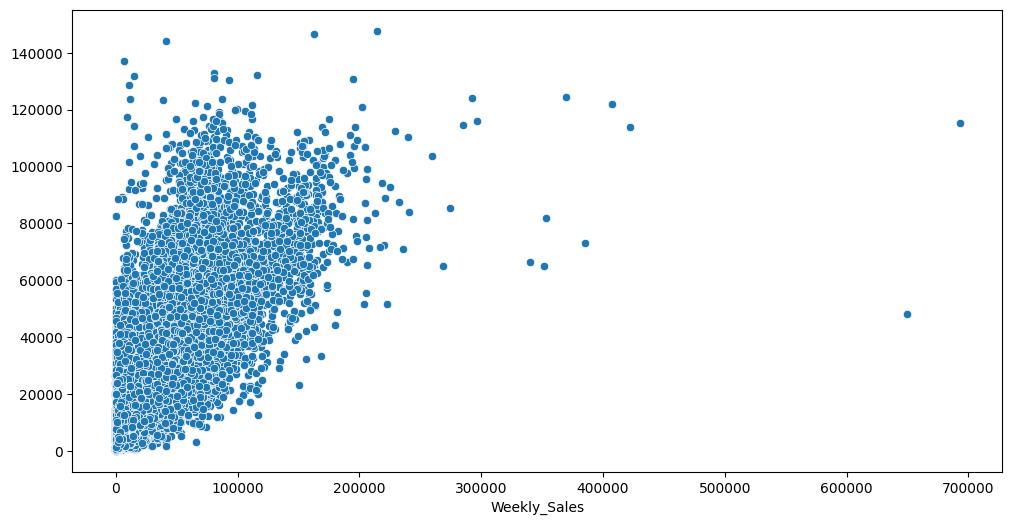

In [ ]:
# scatter plot between observed and predicted values of weekly sales from KNN regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

Decision Tree Regressor Testing

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')


MAE is - 2077.517279929786
RMSE is - 5899.605502055716
Accuracy Score is - 0.9333310231036376


Random Forest Regressor Testing

In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 2094.3344685658
RMSE is - 5038.956971653642
Accuracy Score is - 0.9513638548091641


In [ ]:
#decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
#model_dt = decision_tree_regressor.fit(x_train, y_train)
#import pickle
#with open('model_dt.pkl', 'wb') as file:
#    pickle.dump(model_dt, file)

XGBoost Regressor Testing

In [ ]:
xgb_regressor = XGBRegressor(objective = 'reg:linear', n_estimators = 500, max_depth = 6, nthread = 4, learning_rate = 0.5, random_state = 1234)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {xgb_regressor.score(x_test, y_test)}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:13:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE is - 2087.6737514513097
RMSE is - 4149.89524964932
Accuracy Score is - 0.9670122939788532


Checking Model Performance

<Axes: xlabel='Weekly_Sales'>

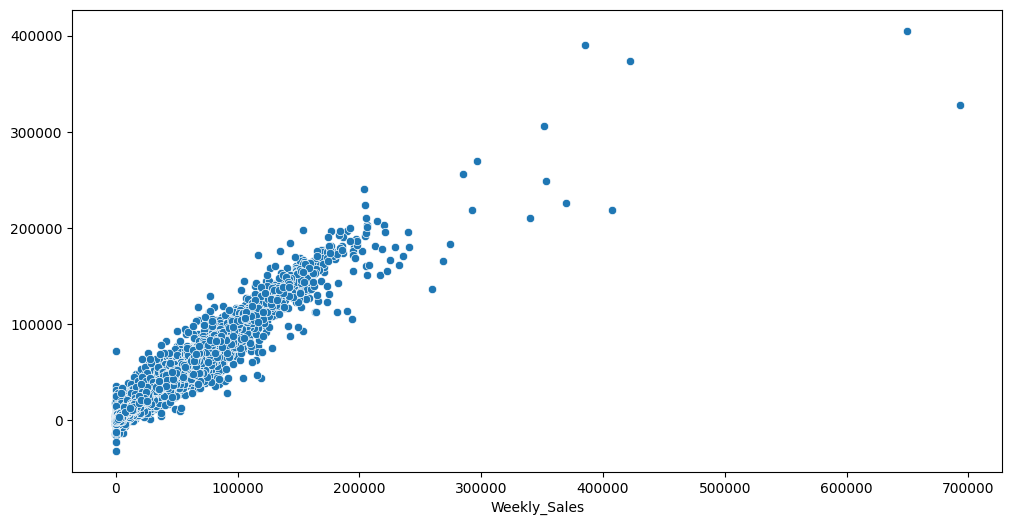

In [ ]:
# scatter plot between observed and predicted values of weekly sales from XGBoost regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

Reason why I am using XGBoost Regressor

* It is more accurate
* It is faster
Reason why I didn't use KNN Regressor

* It is not computayionally efficient for this dataset
* It is slower
* Accuracy depends on the quality of the data.
* With large data, the prediction stage might be slow.
* Sensitive to the scale of the data and irrelevant features.
* Require high memory to store all of the training data.
* Given that it stores all of the training, it can be computationally expensive.

Reason why I didn't use Decision Tree Regressor

* It is not computayionally efficient for this dataset
* Biased towards the dominant class.
* It is slower
Reason why I didn't use Random Forest Regressor

* Increased accuracy requires more trees.
* More trees slow down model.

Saving Models (XGBoost Regressor)

In [ ]:
model = xgb_regressor.fit(x_train, y_train)
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:13:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
